## Text Analytics - Sentiment Analysis

* This tutorial explains how to infer sentiments expressed in tweets. To train the model, a [training dataset](https://inclass.kaggle.com/c/si650winter11) available on kaggle site is taken.

* Then the tweets for the movie *Azhar* is classifies using the model

* The steps for build the model are
    * Load the training data set
    * Tokenize the sentences in the training data set
    * Remove the stop words
    * Create a Document Matrix with TF-IDF Values, which takes each word as features and the TF-IDF score as values for those features.
    * Split the dataset into train and test 
    * Build the model
    * Evaluate the accuracy of the model
    * Apply the model to Azhar dataset
    * Store the results into a csv file

In [1]:
import pandas as pd       
import numpy as np

In [3]:
train_ds = pd.read_csv( "../data/sentiment_train", delimiter="\t" )

In [4]:
train_ds.head( 10 )

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
5,1,that's not even an exaggeration ) and at midni...
6,1,"I loved the Da Vinci Code, but now I want some..."
7,1,"i thought da vinci code was great, same with k..."
8,1,The Da Vinci Code is actually a good movie...
9,1,I thought the Da Vinci Code was a pretty good ...


* Some of the texts have been cut and not shown properly by the display. To change that set max_colwidth parameter as per your screen size in pixels

In [5]:
pd.set_option('max_colwidth', 800)

* Let's look at some negative sentiment tweets

In [6]:
train_ds[train_ds.sentiment == 0][0:10]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."
3948,0,Da Vinci Code does suck.
3949,0,And better...-We all know Da Vinci code is bogus and inaccurate.
3950,0,"Last time, Da Vinci code is also a bit disappointing to me, because many things written in the book is never mentioned in movie."
3951,0,And better...-We all know Da Vinci code is bogus and inaccurate.
3952,0,And better..-We all know Da Vinci code is bogus and inaccurate.


In [7]:
train_ds.shape

(6918, 2)

#### Create a dictionary of features
* Create a dictionary of features and then count the feature values for each sentence
* All words available in all sentences become part of the dictionary
* We will limit number of features to be used in this tutorial to 5000

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### How many features are available and the distribution of their occurances?

In [9]:
count_vectorizer = CountVectorizer() 
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features, 
                                    counts = features_counts ) )

In [10]:
len(features)

2132

In [11]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

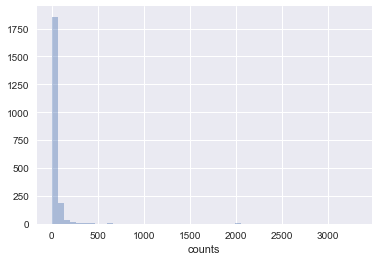

In [12]:
sn.distplot(feature_counts.counts, kde=False, bins=50);

In [13]:
len(feature_counts[feature_counts.counts == 1])

1228

Note: There are featues that have occurred only once in the entire corpus. We can remove all the words that have occureed very rarely.

We will only consider mostly occurring 500 features for the time being.

In [14]:
count_vectorizer = CountVectorizer( max_features = 500 )
feature_vector = count_vectorizer.fit( train_ds.text )
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform( train_ds.text )

#### What are the features extracted?

In [15]:
features[0:20]

['10',
 'about',
 'absolutely',
 'acceptable',
 'aching',
 'acne',
 'action',
 'actually',
 'after',
 'again',
 'all',
 'almost',
 'already',
 'also',
 'always',
 'am',
 'amazing',
 'an',
 'and',
 'angels']

#### Count occurance of these features across all sentences

In [16]:
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features, 
                                    counts = features_counts ) )

In [17]:
feature_counts.head(20)

,counts,features
0,4,10
1,129,about
2,101,absolutely
3,81,acceptable
4,80,aching
5,80,acne
6,9,action
7,14,actually
8,20,after
9,88,again


### Removing Stopwords

The features list contains quite a few words like *am*, *and*, *also* etc, which may have no meaning or contribution towards determining the sentiment of the sentence. Thse words are called **stop words** and can be removed. 

#### Existing stopwords

In [18]:
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS

In [19]:
list(my_stop_words)[0:20]

['neither',
 'via',
 're',
 'besides',
 'forty',
 'this',
 'most',
 'full',
 'along',
 'ever',
 'do',
 'our',
 'whence',
 'last',
 'you',
 'above',
 'been',
 'empty',
 'part',
 'cry']

#### Adding to stopwords

Can some words specific to this corpus be added to the stop words list. Let's check the most occuring words.

In [20]:
feature_counts.sort_values('counts', ascending = False).head(20)

,counts,features
416,3306,the
18,2154,and
180,2093,harry
336,2093,potter
71,2002,code
89,2001,da
457,2001,vinci
286,2000,mountain
58,2000,brokeback
260,1624,love


In [21]:



my_stop_words = text.ENGLISH_STOP_WORDS.union( ['potter', 'code', 'vinci', 'da', 
                                                'harry', 'mountain', 'movie', 'movies'])

In [22]:
count_vectorizer = CountVectorizer( stop_words = my_stop_words, 
                                   max_features = 500 ) 
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )

In [23]:
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features, 
                                    counts = features_counts ) )
feature_counts.sort_values( "counts", ascending = False )[0:20]

,counts,features
40,2000,brokeback
287,1624,love
19,1127,awesome
305,1094,mission
234,1093,impossible
272,974,like
433,602,sucks
431,600,sucked
198,578,hate
366,374,really



### Applying Stemming 

In [24]:
from nltk.stem.snowball import EnglishStemmer

In [25]:
def stemmed_words(doc):
    ### Stemming of words
    stemmed_words = (stemmer.stem(w) for w in analyzer(doc))
    ### Remove the words in stop words list
    return [ word for word in list(set(stemmed_words) - set(my_stop_words)) ]

In [26]:
stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()

In [27]:
count_vectorizer = CountVectorizer( analyzer=stemmed_words, 
                                   max_features = 500 ) 
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )

In [29]:
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features, 
                                    counts = features_counts ) )
feature_counts.sort_values( "counts", ascending = False )[0:20]

,counts,features
50,1930,brokeback
199,1916,harri
284,1837,love
437,1378,suck
27,1116,awesom
300,1090,mission
227,1090,imposs
306,1052,movi
272,823,like
201,636,hate


In [30]:
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [31]:
train_ds_df = pd.DataFrame(train_ds_features.todense())

In [32]:
train_ds[0:1]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.


We know the word *awesome* is encoded as column index 27, so we will display the columns ranging from 20 to 27.

In [33]:
train_ds_df.columns = features

In [34]:
train_ds_df.iloc[0:1, 20:30]

,anyth,appar,ask,ass,audrey,aw,award,awesom,bad,ball
0,0,0,0,0,0,0,0,1,0,0


It can be noted the word *awesom* is encoded as 1.

### Checking words occurances across different sentiments

Add the column *sentiment* to the dataframe and then filter words occurances for different sentiments.

In [35]:
train_ds_df['sentiment'] = train_ds.sentiment

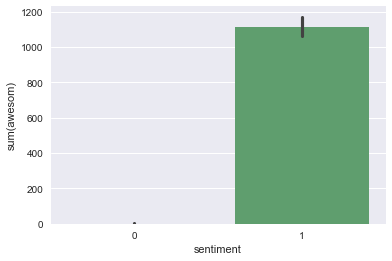

In [36]:
sn.barplot( x = 'sentiment', y = 'awesom', data = train_ds_df, estimator=sum );

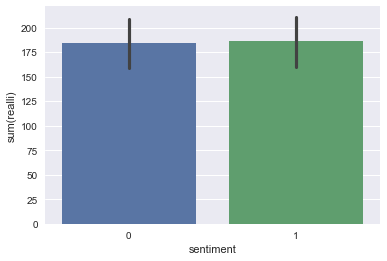

In [37]:
sn.barplot( x = 'sentiment', y = 'realli', data = train_ds_df, estimator=sum );

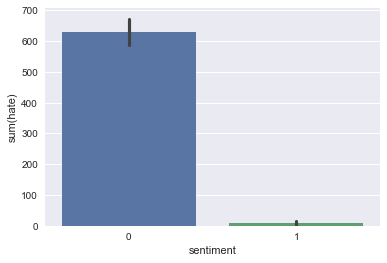

In [38]:
sn.barplot( x = 'sentiment', y = 'hate', data = train_ds_df, estimator=sum );

### Build a naive-bayes classifier

In [39]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split

In [40]:
clf = GaussianNB()

In [41]:
train_X, test_X, train_y, test_y = train_test_split( train_ds_features, 
                                                    train_ds.sentiment, 
                                                    test_size = 0.3, 
                                                    random_state = 42 )

In [42]:
clf.fit( train_X.toarray(), train_y )

GaussianNB(priors=None)

### Test the model

In [43]:
test_ds_predicted = clf.predict( test_X.toarray() )

### Evaluate the model

In [44]:
from sklearn import metrics

In [45]:
cm = metrics.confusion_matrix( test_y, test_ds_predicted )

In [46]:
cm

array([[ 847,   26],
       [  26, 1177]])

In [47]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

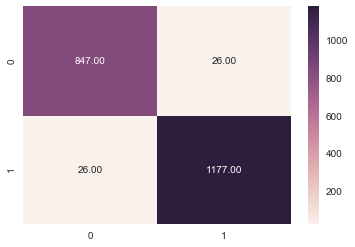

In [48]:
sn.heatmap(cm, annot=True,  fmt='.2f' );

In [49]:
score = metrics.accuracy_score( test_y, test_ds_predicted )

In [50]:
score

0.97495183044315992

Accuracy is very high as the test set contains mostly formally written sentences.

## Predicting Azhar Movies

### Loading Azhar Movie Tweets

In [53]:
# read the entire file into a python array
with open('../data/azhar.json', 'r') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

In [54]:
data_json_str = "[" + ','.join(data) + "]"

In [55]:
azhar_df = pd.read_json(data_json_str)

In [56]:
final_columns = ['id', 'text', 'retweeted']

In [57]:
azhar_df = azhar_df[final_columns]

In [58]:
azhar_df.head( 1 )

,id,text,retweeted
0,731037880219504640,RT @bookmyshow: 8. Name the city #Azhar is from? #AzharToday @AzharTheFilm,False


In [59]:
azhar_df = azhar_df[['text']]

In [60]:
azhar_df.head( 10 )

,text
0,RT @bookmyshow: 8. Name the city #Azhar is from? #AzharToday @AzharTheFilm
1,RT @bookmyshow: 3. True Or False: @ItsPrachiDesai plays Naureen in #Azhar? #AzharToday @AzharTheFilm
2,@bookmyshow @ItsPrachiDesai @AzharTheFilm #Azhar #AzharToday Q.3 True
3,RT @bookmyshow: 8. Name the city #Azhar is from? #AzharToday @AzharTheFilm
4,@bookmyshow @AzharTheFilm Q8 Ans : Hyderabad #AzharToday #Azhar
5,RT @bookmyshow: 8. Name the city #Azhar is from? #AzharToday @AzharTheFilm
6,RT @bollywood_life: @emraanhashmi hits a sixer with #Azhar. Read our 3 star review:https://t.co/bLmOS5slfW @balajimotionpic https://t.co/09…
7,RT @bookmyshow: 2. What is the name of #Azhar’s first wife? #AzharToday @AzharTheFilm
8,RT @bookmyshow: 8. Name the city #Azhar is from? #AzharToday @AzharTheFilm
9,RT @taran_adaarsh: #AZHAR is Outstanding..Don't miss it!\n@emraanhashmi's career's best performance &amp; his best film by far!! Must Watch film…


There are too many promotional tweets from bookmyshow, let's delete these tweets.

In [61]:
azhar_df = azhar_df[-azhar_df.text.str.contains( "@bookmyshow" )]

In [62]:
azhar_df.head( 2 )

,text
6,RT @bollywood_life: @emraanhashmi hits a sixer with #Azhar. Read our 3 star review:https://t.co/bLmOS5slfW @balajimotionpic https://t.co/09…
9,RT @taran_adaarsh: #AZHAR is Outstanding..Don't miss it!\n@emraanhashmi's career's best performance &amp; his best film by far!! Must Watch film…


### Creating feature map

Convert these tweets into Document Matrix using the dictionary we created while building the model

In [63]:
azhar_text = count_vectorizer.transform( azhar_df.text )

### Classify the tweets

In [64]:
azhar_df["sentiment"] = clf.predict( azhar_text.toarray() )

In [65]:
azhar_df[['text', "sentiment"]][0:10]

,text,sentiment
6,RT @bollywood_life: @emraanhashmi hits a sixer with #Azhar. Read our 3 star review:https://t.co/bLmOS5slfW @balajimotionpic https://t.co/09…,0
9,RT @taran_adaarsh: #AZHAR is Outstanding..Don't miss it!\n@emraanhashmi's career's best performance &amp; his best film by far!! Must Watch film…,1
10,RT @ursmehreen: Omg! Today is Friday! #Azhar release 😍 how can I be thinking that it's Thursday? 🙈 #oops,1
11,RT @taran_adaarsh: #AZHAR is Outstanding..Don't miss it!\n@emraanhashmi's career's best performance &amp; his best film by far!! Must Watch film…,1
13,"RT @girishjohar: #Azhar starts on a comfortable note, strong WOM will ensure it has a good day 1 at the BO.... feedback is encouraging @emr…",1
14,RT @bobbytalkcinema: AZHAR - Interesting twist in the court case is here focussing on Lara Dutta.,1
16,Azhar Movie Review and Rating Hit or Flop Public Talk https://t.co/JFqo2P7WKP https://t.co/FesHpSZOzw,0
17,RT @itimestweets: Live #Azhar review: @emraanhashmi's portrayal of @azharflicks is truly admirable! @EmraanAddicted @TahaAmeen24 @BrotherOf…,0
19,RT @rajcheerfull: Looking forward to #Azhar . Congratulations &amp; best wishes @EkmainaurEktu7 @ItsPrachiDesai @emraanhashmi @azharflicks http…,1
20,@TrollKejri your review on #Azhar #Azharthefilm,0


### Store the final results

In [66]:
azhar_df.to_csv( "azhar_sentiments.csv", index = False )

### To Do

- Use Bigrams 
    - ngram_range=(1, 2)
- Use TF-IDF Vectorizer
    - sklearn.feature_extraction.text.TfidfVectorizer
- Use Random Forest Model and find most important features (words) for determining the sentiment of the sentences

### References

https://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1,2)) 
feature_vector = count_vectorizer.fit( train_ds.text )